In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**if want to work in a single column then specify this thing and do operation on this thing
df['Column name']**

In [3]:
file = 'Diwali Sales Data.csv'
df = pd.read_csv(file, encoding = 'unicode_escape')

df.drop(df[['Status','unnamed1']], inplace = True, axis = 1 )

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


**Know About The Data**

In [149]:
df.shape
# df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


**Find Out the Null values**

In [41]:
# checking for the null values
print( df.isnull().sum() )

null = (df['Amount'].isnull())
print(null)


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64
0        False
1        False
2        False
3        False
4        False
         ...  
11246    False
11247    False
11248    False
11249    False
11250    False
Name: Amount, Length: 11251, dtype: bool


**replace The Null Values with mean values**

In [46]:
Mean_amount = round(df['Amount'].mean())
print(Mean_amount)

df['Amount'] = df['Amount'].fillna(Mean_amount)
# same as this
# df['Amount'].fillna(df['Amount'].mean(), inplace=True)

# droping the null columns
# df.dropna(inplace = true)

9454


**Changing Data Type of an Column**

In [51]:
df['Amount'] = df['Amount'].astype('int')
df[5:10]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,9454
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799


**renaming Columns**

In [59]:
# columns = Dict{ Key: value 
df.columns
df.rename(columns = {'Marital_Status':'Shadii'}, inplace = True)
df.columns
df.rename(columns = {'Shadii':'Marital_Status', 'Cust_name':'Coust_Name'}, inplace = True)
df.columns

Index(['User_ID', 'Coust_Name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Stat of the numeric Data**

In [5]:
df.describe()
df[['Age', 'Orders', 'Amount']].describe().round()

,Age,Orders,Amount
count,11251.0,11251.0,11239.0
mean,35.0,2.0,9454.0
std,13.0,1.0,5222.0
min,12.0,1.0,188.0
25%,27.0,2.0,5443.0
50%,33.0,2.0,8109.0
75%,43.0,3.0,12675.0
max,92.0,4.0,23952.0


In [6]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**To see all the Data in Product Category**

In [79]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [24]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

# Exploratory data Analysis

## Gender

### countplot() and barplot() 
are both used for visualizing categorical data in seaborn, but they serve slightly different purposes:

use **countplot()** when you want to show how many times each category appears like F , M

use **barplot()** when you want to show the summary statistics of a numeric variable across categories (for X , Y).

**male & female diversion**

   Gender
1    3409
0    7842


<Axes: xlabel='Gender', ylabel='count'>

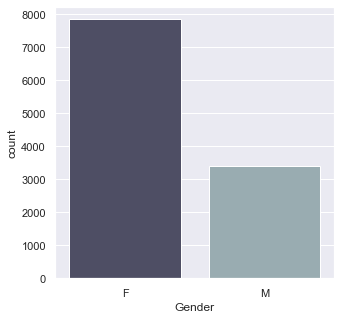

In [125]:
sale_gen = df.groupby(['Gender'] , as_index = False)['Gender'].count().sort_values(by = 'Gender')
print(sale_gen)

sns.countplot(data = df, x = 'Gender', palette = 'bone')

**male & female contribution in sales**

  Gender      Amount
1      M  31913276.0
0      F  74335856.0


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

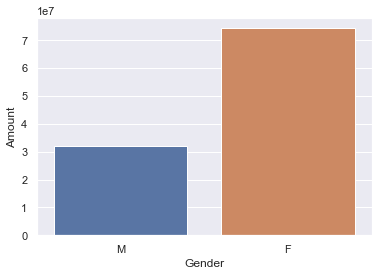

In [77]:
sale_gen = df.groupby(['Gender'] , as_index = False)['Amount'].sum().round().sort_values(by = 'Amount')
print(sale_gen)

sns.barplot(data = sale_gen, x = 'Gender', y = 'Amount')


**[Females Tends to shop more than Mens]**

df.groupby(['Gender'] , as_index = False)['Amount'] -- will return grouped Object so we have to use agg funs()

as_index=False: Ensures that the 'Gender' column is not used as the index in the resulting DataFrame, keeping it as a regular column.

Select the 'Amount' column from the grouped data to perform the aggregation.

## Age Group by Genders

**Age Group Diversion**

<Axes: xlabel='Age Group', ylabel='count'>

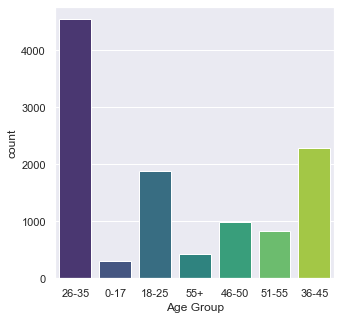

In [46]:
# Only Show the Various Age Group plotted
# palette='viridis, 'plasma', 'Blues', 'husl', 'pastel
sns.set(rc ={ 'figure.figsize':(5,5)})

sns.countplot(data = df, x = 'Age Group', palette='viridis')

**Male and Female diverion in Age Group**

<AxesSubplot:xlabel='Age Group', ylabel='count'>

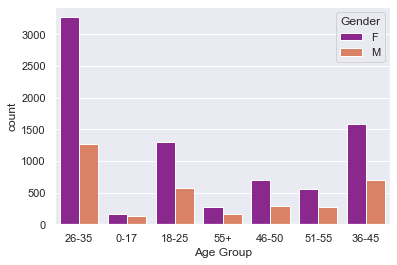

In [94]:
# Devide each group with respect to Gender
# palette='viridis, 'plasma', 'Blues', 'husl', 'pastel
sns.set(rc ={ 'figure.figsize':(5,5)})


sns.countplot(data  = df, x = 'Age Group', hue = 'Gender', palette='plasma')

**average amount spent by customers in each age group**

<Axes: xlabel='Age Group', ylabel='Amount'>

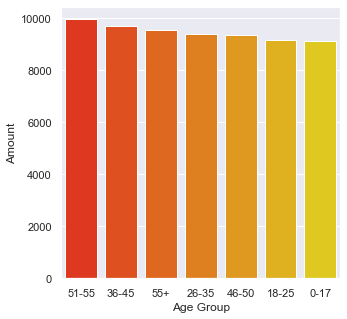

In [121]:
sns.set(rc ={ 'figure.figsize':(5,5)})

avg_amount_by_age = df.groupby(['Age Group'] , as_index = False)['Amount'].mean().round().sort_values(by = 'Amount', ascending = False)
# print(avg_amount_by_age)

sns.barplot(data  = avg_amount_by_age, x = 'Age Group', y = 'Amount', palette='autumn')

**[ Females between age group of 26-35 Tends to shop more than age group of 0-17 ]**

**[ same for males between age group of 26-35 Tends to shop more than age group of 0-17 ]**

## State wise Order Quantity & it's Amount

**customer distribution across different states** 

<Axes: xlabel='State', ylabel='Orders'>

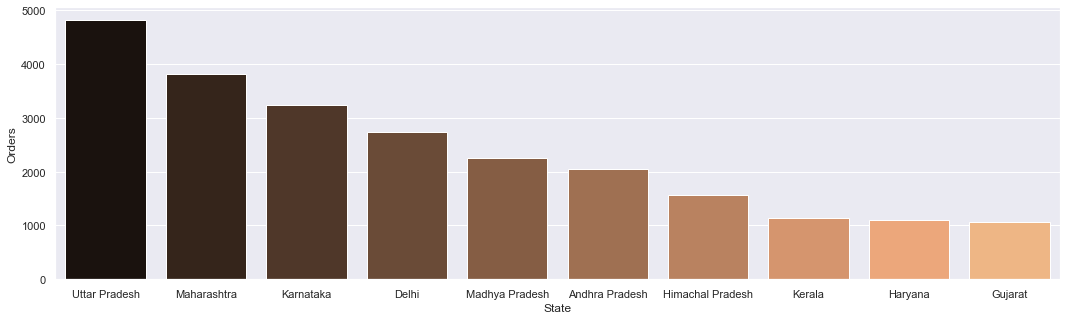

In [120]:
# To streach the Data Visual Pic
sns.set(rc ={ 'figure.figsize':(18,5)})

State_Order = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
# print(State_Order)

sns.barplot(data = State_Order, x = 'State', y = 'Orders', palette = 'copper')

**State wise Total Amount** 

<Axes: xlabel='State', ylabel='Amount'>

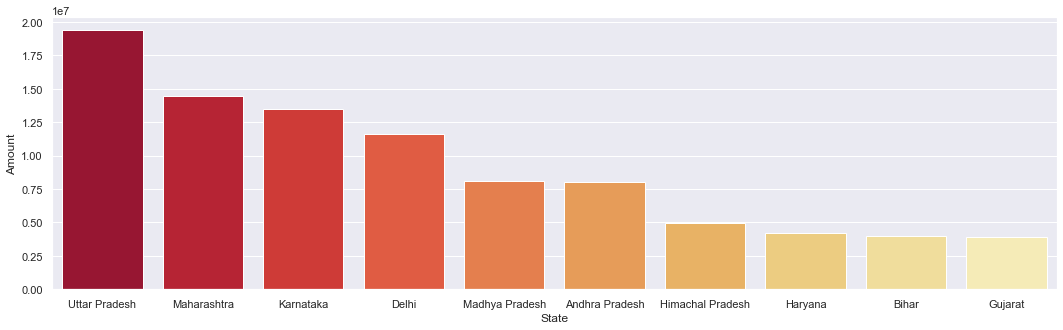

In [118]:
# To streach the Data Visual Pic
sns.set(rc ={ 'figure.figsize':(18,5)})

state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).round().head(10)
# print(state)

sns.barplot(data = state, x = 'State', y = 'Amount', palette= 'YlOrRd_r')

**[ Most sales comes from UP, maharashtra, Karnataka while least order purchased from Kerala, Haryana, Gujrat ]** 

## Occupation

**Occupation wise Order**

<Axes: xlabel='Occupation', ylabel='Amount'>

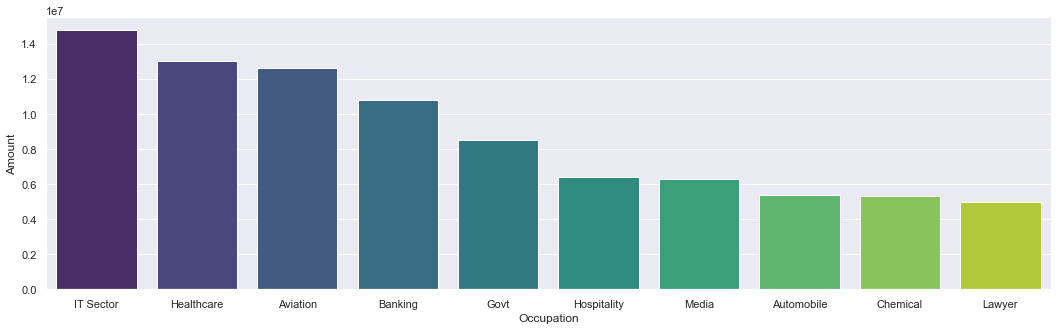

In [61]:
# To streach the Data Visual Pic
sns.set(rc ={ 'figure.figsize':(18,5)})

state = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).round().head(10)
# print(state)


sns.barplot(data = state, x = 'Occupation', y = 'Amount', palette='viridis')

**[ in Occupation wise order amount & Quantity Top Occupation is IT-sector & lowest Occupation is Lawer in top 10]**

## Maritial Status

**Gender By maritial status**

<Axes: xlabel='Marital_Status', ylabel='count'>

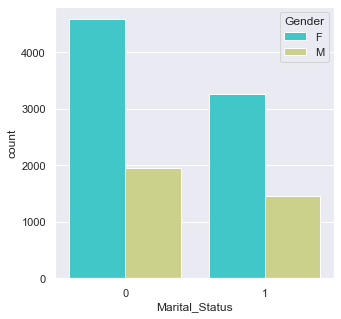

In [150]:
df['Gender'].count()         # 11251 'F' , 'M'
df['Marital_Status'].count() # 11251 [ married '1' 4,729] [unmarried '0' 6,522]

mapping = {0: 'unmarried', 1: 'married'}
df['Marital_Status_Details'] = df['Marital_Status'].map(mapping)

sns.countplot(data = df, x = 'Marital_Status', hue = 'Gender', palette = 'rainbow')

**Sale analysis in married customers**

  Gender  Marital_Status
0      F            3266
1      M            1463


<Axes: xlabel='Gender', ylabel='Marital_Status'>

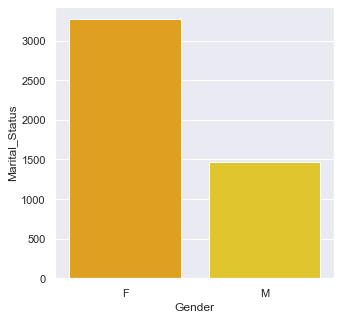

In [152]:
# To streach down the Data Visual Pic
sns.set(rc ={ 'figure.figsize':(5,5)})

gender_by_Married = df.groupby(['Gender'], as_index = False)['Marital_Status'].sum().sort_values('Marital_Status', ascending = False)
print(gender_by_Married)

sns.barplot(x = 'Gender', y = 'Marital_Status', data = gender_by_Married, palette = 'Wistia_r')

**[ Unmarried Women Tends to buy more things than married women :) same as men too ]**

## Occupation

<Axes: xlabel='Occupation', ylabel='User_ID'>

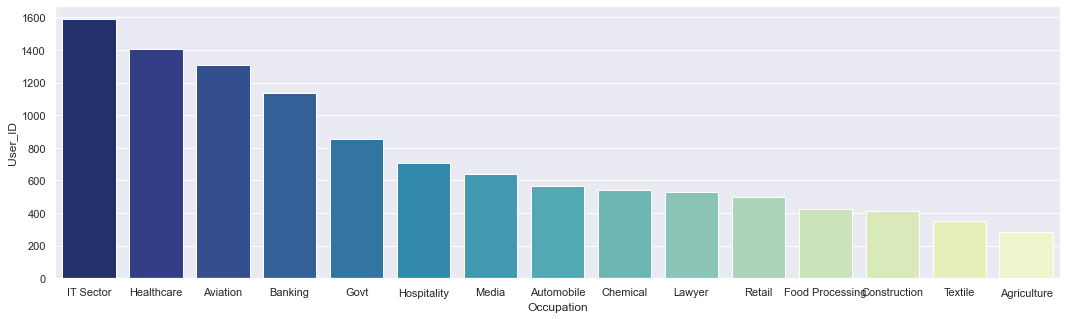

In [114]:
sns.set(rc ={ 'figure.figsize':(18,5)})

Occu_by_ID = df.groupby(['Occupation'] , as_index = False)['User_ID'].count().sort_values('User_ID', ascending = False)
sns.barplot(data = Occu_by_ID, x = 'Occupation', y = 'User_ID', palette = 'YlGnBu_r')

**Occupation wise Marital_Status**

<Axes: xlabel='Occupation', ylabel='Marital_Status'>

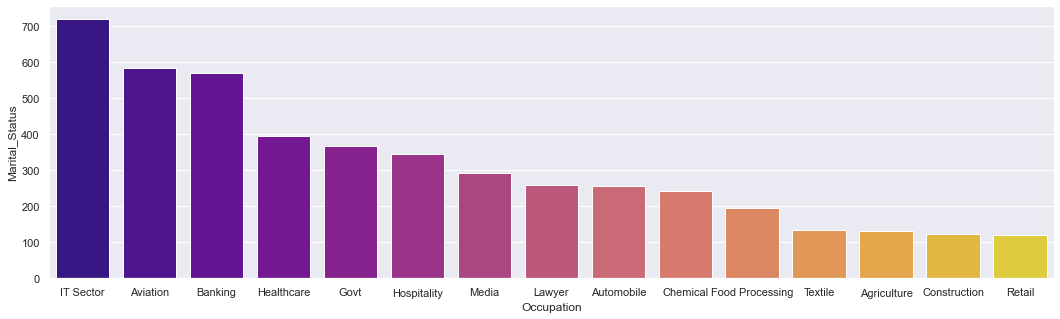

In [42]:
# To streach down the Data Visual Pic
sns.set(rc ={ 'figure.figsize':(18,5)})

gender_by_Married = df.groupby(['Occupation'], as_index = False)['Marital_Status'].sum().sort_values('Marital_Status', ascending = False)
# print(gender_by_Married)

sns.barplot(x = 'Occupation', y = 'Marital_Status', data = gender_by_Married, palette = 'plasma')

**[ It sector, Aviation, Banking sector Coustomer tends to shope more than Agriculture, Construction & Retails ]**

## Purchase Behavior Analysis:

**product categories have the highest number of orders.**

<Axes: xlabel='Product_Category', ylabel='Orders'>

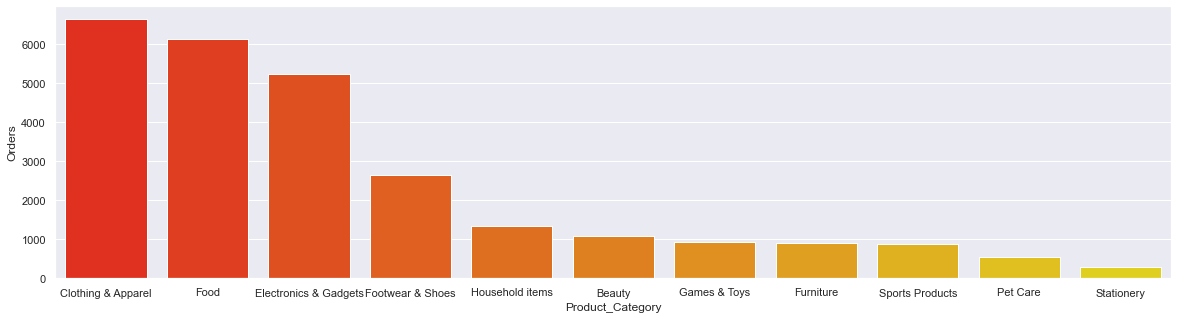

In [100]:
#df[['Product_Category', 'Orders']]
sns.set(rc ={ 'figure.figsize':(20,5)})

Product_order = df.groupby(['Product_Category'], as_index = False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(11)
sns.barplot(data = Product_order, x = 'Product_Category', y = 'Orders', palette= 'autumn' )

**[ Clothing & Apparel, Food, electronics id brought the most where stationary, furniture, pet care, sports brought the least  ]**

## Zone Wise Sale

**Zone wise sale Amount**

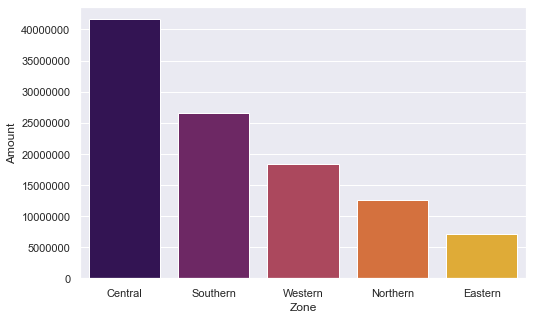

In [112]:
sns.set(rc ={ 'figure.figsize':(8,5)})

Zone_sale = df.groupby(['Zone'], as_index = False)['Amount'].sum().round().sort_values(by = 'Amount', ascending = False)
# print(Zone_sale)

sns.barplot(data = Zone_sale, x = 'Zone', y = 'Amount', palette=  'inferno') 
plt.ticklabel_format(style='plain', axis='y')

**Zone wise sale Order**

<Axes: xlabel='Zone', ylabel='Orders'>

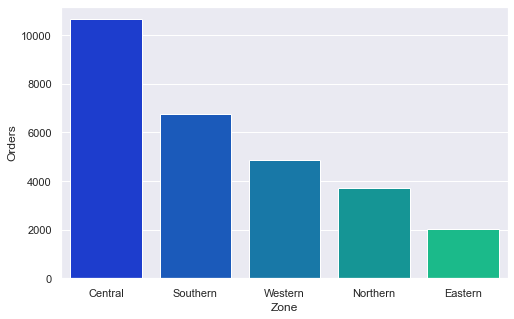

In [115]:
sns.set(rc ={ 'figure.figsize':(8,5)})
Zone_order = df.groupby(['Zone'], as_index = False)['Orders'].sum().round().sort_values(by = 'Orders', ascending = False)
# print(Zone_order)

sns.barplot(data = Zone_order, x = 'Zone', y = 'Orders', palette= 'winter')

**[ Central region tends to order most than eastern ]**

# Summary of the Insights

**Gender Shopping Trends:** Females tend to shop more than males.

**Age Group Shopping Trends:** Both females and males in the 26-35 age group shop more compared to the 0-17 age group.

**Geographic Sales:** The highest sales are from Uttar Pradesh, Maharashtra, and Karnataka, while Kerala, Haryana, and Gujarat have the lowest.

**Occupation-based Shopping:** IT-sector professionals have the highest order amounts and quantities, while lawyers rank lowest among the top 10 occupations.

**Marital Status and Shopping:** Unmarried women and men tend to buy more than their married counterparts.

**Product Categories:** Clothing & Apparel, Food, and Electronics are the most purchased, while Stationery, Furniture, Pet Care, and Sports items are the least.

**Regional Sales:** The Central region has the highest order volume, surpassing the Eastern region.